## Описание данных

Необходимо определить факторы выживания пассажиров (не менее 2) на борту лайнера Титаник. Воспользуемся готовым датасетом titanic из библиотеки seaborn.

Стисок столбцов:  
- survival - выжившие, (1 - да, 0 - нет),
- pclass - класс (1 - первый, 2 - второй, 3 - третий),
- sex - пол (male - мужской, female - женский),
- age - возраст,
- sibsp - количество сиблингов (братьев и сестер)/супругов на борту Титаник,
- parch - количество детей/родителей на борту Титаника,
- fare - стоимость билета,
- cabin - номер каюты,
- embarked - порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)
- class - класс,
- adult_male - являлся ли пассажир взрослым,
- deck - палуба,
- embark_town - порт посадки,
- alive - выжил ли пассажир,
- alone - пассажир ехал один или с семьей

## Загрузка данных

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from scipy.stats import chi2_contingency

Загрузим и изучим датасет:

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Предварительный анализ данных

### Анализ категориальных данных

Рассмотрим категориальные столбцы survived, sex, pclass и embarked.

In [8]:
cat_list = ['survived', 'sex', 'pclass', 'embark_town']

In [9]:
for column in cat_list:
    print(f'Столбец {column}')
    print(df[column].value_counts(normalize=True, dropna=False))
    print()

Столбец survived
0    0.616162
1    0.383838
Name: survived, dtype: float64

Столбец sex
male      0.647587
female    0.352413
Name: sex, dtype: float64

Столбец pclass
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

Столбец embark_town
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64



Из полученных данных видно, что процент выживших - 38% против 62% - погибших. 

Женщин на лайнере было 35%, а мужчин - 65%. Распределение же пассажиров по классам: 1 класс - 21%, 2 класс - 24%, а большинство 55% - это пассажиры 3 класса. Большинство пассажиров поднялись на лайнер в Southampton - 72%, затем - 19% - в Cherbourg, а остальные 9% - в Queenstown.

### Анализ количественных данных

Изучим столбец Age - возраст пассажиров.

In [10]:
sns.set_theme(rc={'figure.figsize':(12, 7)})
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale = 2)

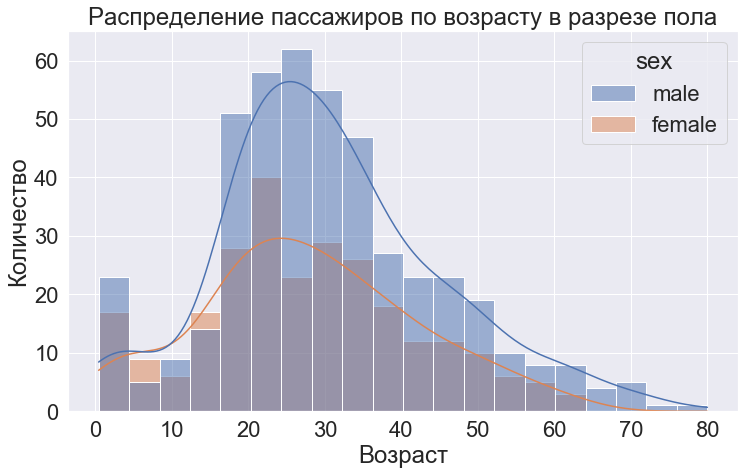

In [11]:
sns.histplot(data=df, x='age', kde=True, hue = 'sex')
plt.title('Распределение пассажиров по возрасту в разрезе пола')
plt.ylabel('Количество')
plt.xlabel('Возраст')
plt.show()

Рассмотрим столбец fare, содержащий стоимость билета:

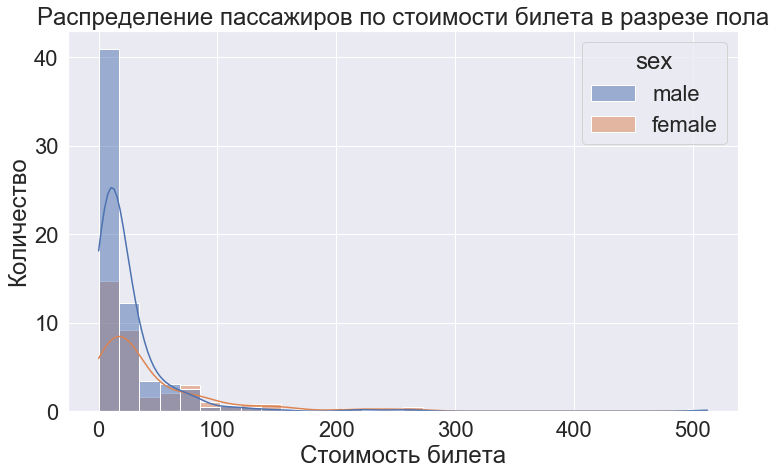

In [12]:
sns.histplot(data=df, x='fare', kde=True, stat="percent", hue = 'sex', bins=30)
plt.title('Распределение пассажиров по стоимости билета в разрезе пола')
plt.ylabel('Количество')
plt.xlabel('Стоимость билета')
plt.show()

### Анализ остальных признаков

Проверим наличие и колисество семьи пассажиров:

In [13]:
family_list = ['sibsp', 'parch']

In [14]:
for column in family_list:
    print(f'Столбец {column}')
    print(df[column].value_counts(dropna=False, normalize = True))
    print()

Столбец sibsp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64

Столбец parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64



Большинство людей одиночки - 68%, 23% пассажира поехали в путешествие вдвоем, а остальные 9% поехали в компании 3 и более людей. Также большинство пассажиров - 76% поехали без детей, 13% - с одном ребенком, 9% - с двумя, а остальные 2% - с 3 и более.

### Предварительный вывод

Портрет пассажира Титаника - это одинокий мужчина 30 лет, путешествующий 3 классом и со стоимостью билета 15.

## Анализ данных в разрезе выживаемости пассажира

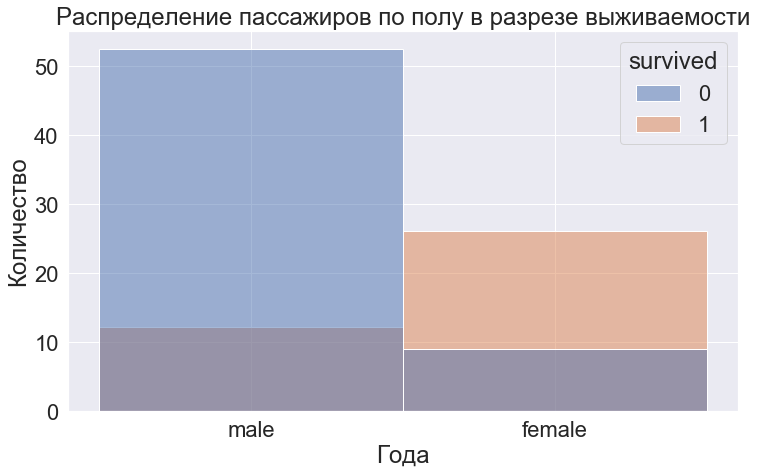

In [15]:
sns.histplot(data=df, x='sex', kde=False, stat="percent", hue = 'survived', discrete=True)
plt.title('Распределение пассажиров по полу в разрезе выживаемости')
plt.ylabel('Количество')
plt.xlabel('Года')
plt.show()

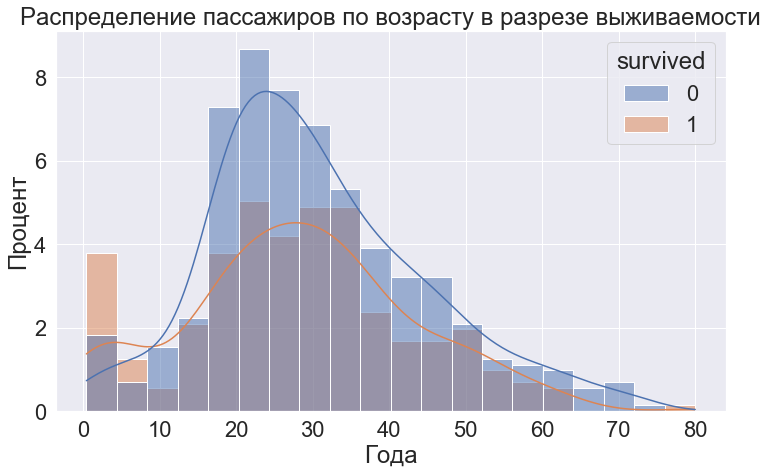

In [16]:
sns.histplot(data=df, x='age', kde=True, stat="percent", hue = 'survived')
plt.title('Распределение пассажиров по возрасту в разрезе выживаемости')
plt.ylabel('Процент')
plt.xlabel('Года')
plt.show()

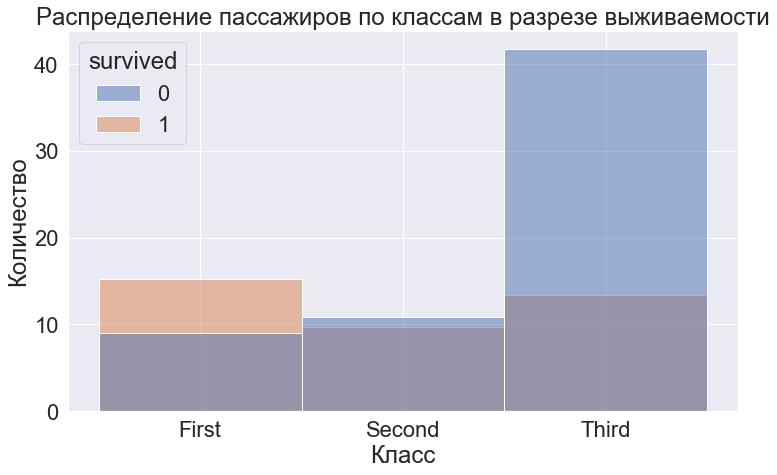

In [17]:
sns.histplot(data=df, x='class', kde=False, stat="percent", hue = 'survived', discrete=True)
plt.title('Распределение пассажиров по классам в разрезе выживаемости')
plt.ylabel('Количество')
plt.xlabel('Класс')
plt.show()

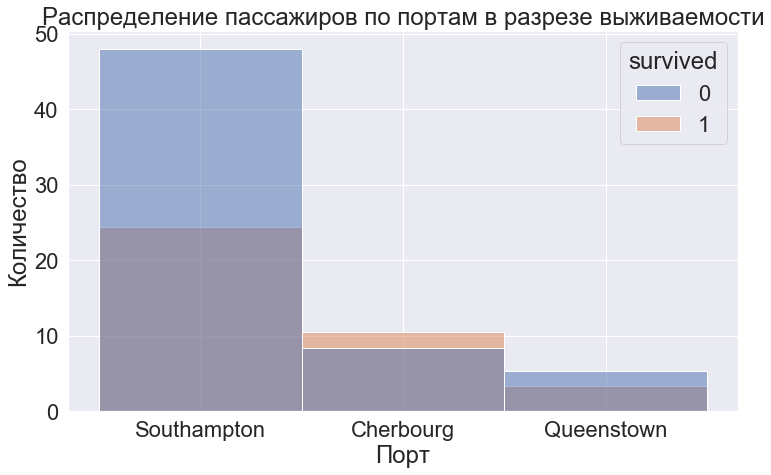

In [18]:
sns.histplot(data=df, x='embark_town', kde=False, stat="percent", hue = 'survived', discrete=True)
plt.title('Распределение пассажиров по портам в разрезе выживаемости')
plt.ylabel('Количество')
plt.xlabel('Порт')
plt.show()

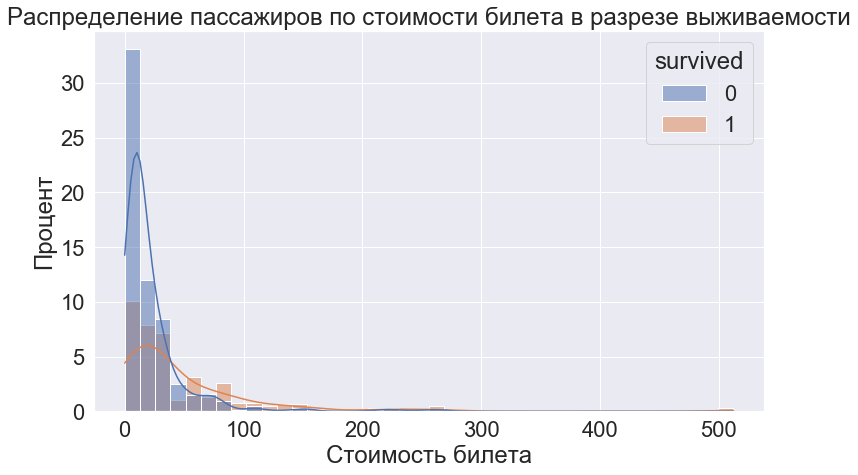

In [19]:
sns.histplot(data=df, x='fare', kde=True, stat="percent", hue = 'survived', bins=40)
plt.title('Распределение пассажиров по стоимости билета в разрезе выживаемости')
plt.ylabel('Процент')
plt.xlabel('Стоимость билета')
plt.show()

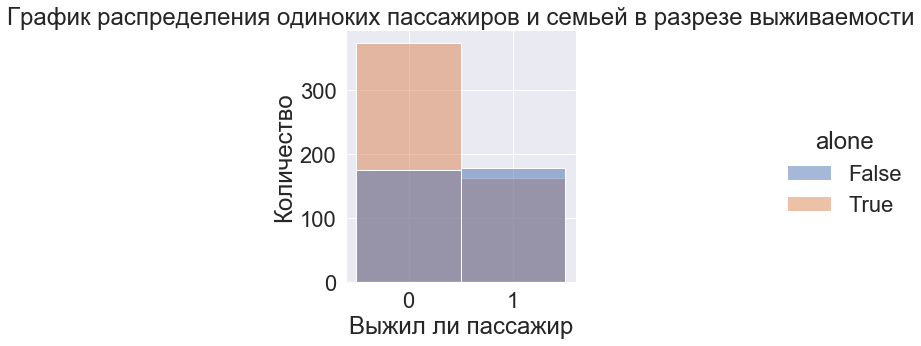

In [20]:
sns.displot(data=df, x='survived', hue = 'alone', discrete=True)
plt.title('График распределения одиноких пассажиров и семьей в разрезе выживаемости')
plt.ylabel('Количество')
plt.xlabel('Выжил ли пассажир')
plt.show()

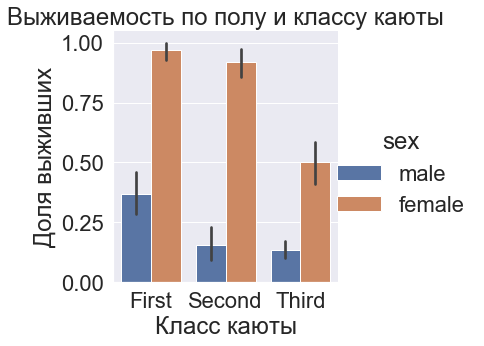

In [21]:
sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=df)
plt.title('Выживаемость по полу и классу каюты')
plt.ylabel('Доля выживших')
plt.xlabel('Класс каюты')
plt.show()

Составим таблицы выживаемости

In [22]:
df.pivot_table(values='survived', index='sex', columns=['class', 'alone'], aggfunc='mean')

class      First              Second               Third          
alone      False      True     False      True     False      True
sex                                                               
female  0.966667  0.970588  0.931818  0.906250  0.416667  0.616667
male    0.425532  0.333333  0.277778  0.097222  0.180723  0.121212

In [23]:
df.pivot_table(values='survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [24]:
df.groupby('sex').agg({'survived': 'mean'})

,survived
sex,
female,0.742038
male,0.188908


In [25]:
df.groupby('class').agg({'survived': 'mean'})

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [26]:
df.groupby('adult_male').agg({'survived': 'mean'})

,survived
adult_male,
False,0.717514
True,0.163873


## Вывод

Из полученных данных можно сделать вывод:


Пол - самый значимый фактор: 74.2% женщин выжило, а мужчин -  только 18.9%.
Класс каюты - пассажиры 1-го класса выживали в 62.9% случаев, 2-го класса - 47.2%,а пассажиры 3-го класса всего лишь в 24.2%.

Возраст также играл роль - 71.8% детей выжили, против 16.4% взрослых.

Комбинация факторов - женщины из 1-го класса имели наивысшие шансы (96.8% выживаемости), тогда как мужчины из 3-го класса - наименьшие (13.5%).

Самый высокий процент выживаемости - женщины 1 класса, которые путешествовали с детьми или супругом. Самый низкий процент выживаемости - мужчина с детьми или супругой 2 класса - 9.7% выживаемости.

## Статистический анализ данных

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Закодируем категориальные данные столбцов embarked, sex, adult_male, deck, alone.

In [38]:
cat_list = ['embarked', 'sex', 'adult_male', 'deck', 'alone']

In [39]:
df[cat_list] = df[cat_list].astype('category')

In [40]:
df['alone_n'] = df['alone'].astype(int)
df['adult_male'] = df['adult_male'].astype(int)

In [41]:
df['embarked_n'] = df['embarked'].cat.codes
df['sex_n'] = df['sex'].cat.codes
df['deck_n'] = df['deck'].cat.codes

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alone_n,embarked_n,sex_n,deck_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,False,0,2,1,-1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0,0,0,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,True,1,2,0,-1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0,2,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,True,1,2,1,-1


Рассмотрим основные статистические показатели:

In [43]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone_n,embarked_n,sex_n,deck_n
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,0.602694,1.529742,0.647587,-0.232323
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,0.489615,0.800254,0.477990,1.572556
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,-1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,2.000000,1.000000,-1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000,1.000000,-1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,2.000000,1.000000,6.000000


Проверим признаки на линейную зависимость. Построим матрицу корелляции:

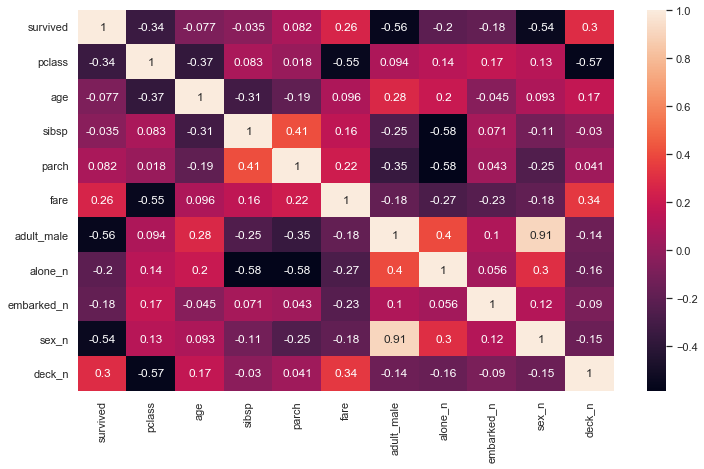

In [50]:
sns.set_context('notebook', font_scale = 1)
sns.heatmap(df.corr(), annot=True)
plt.show()

Как видно из таблицы, линейная зависимость видна только по признаку пола, да и то небольшая. 


Проверим теперь взаимосвязь признаков между категориальными признаками:

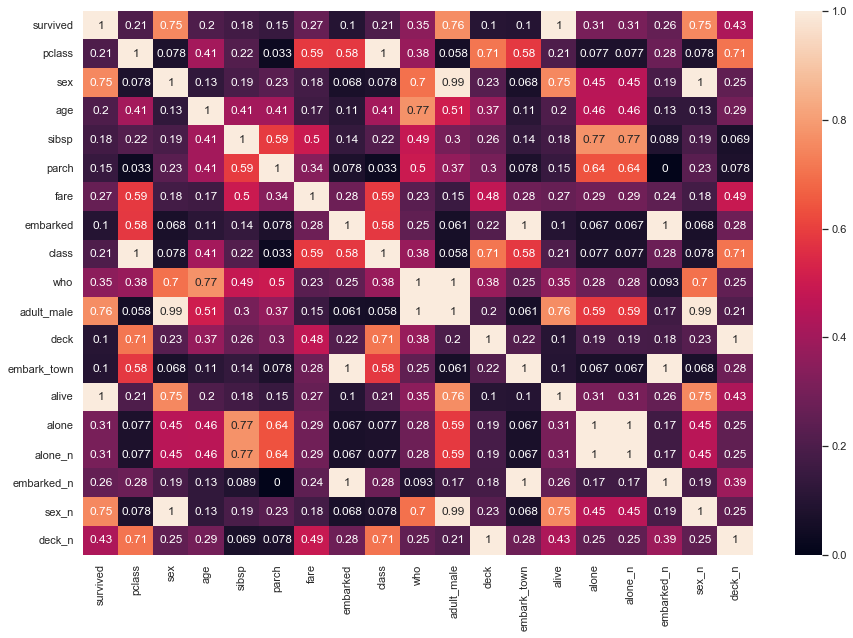

In [66]:
sns.set_theme(rc={'figure.figsize':(15, 10)})
sns.heatmap(df.phik_matrix(interval_cols=['survived', 'pclass', 'age', 'sibsp', 'parch', 
                                          'fare', 'adult_male', 'alone_n', 'embarked_n', 
                                          'sex_n', 'deck_n']), annot=True)

Теперь видно сильную карреляцию между выживаемостью пассажира и такими признаками как пол (sex), является ли пассажир взрослым мужчиной (adult_male).

Проверим теперь нелинейную зависимость между выживаемостью и остальными признаками. Для этого построим диаграммы рассеивания.

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alone_n,embarked_n,sex_n,deck_n
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,False,0,2,1,-1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0,0,0,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,True,1,2,0,-1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0,2,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,True,1,2,1,-1


In [55]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'alone_n', 'embarked_n', 'sex_n', 'deck_n'],
      dtype='object')

In [57]:
last_features = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 
                 'alone_n', 'embarked_n', 'sex_n', 'deck_n']

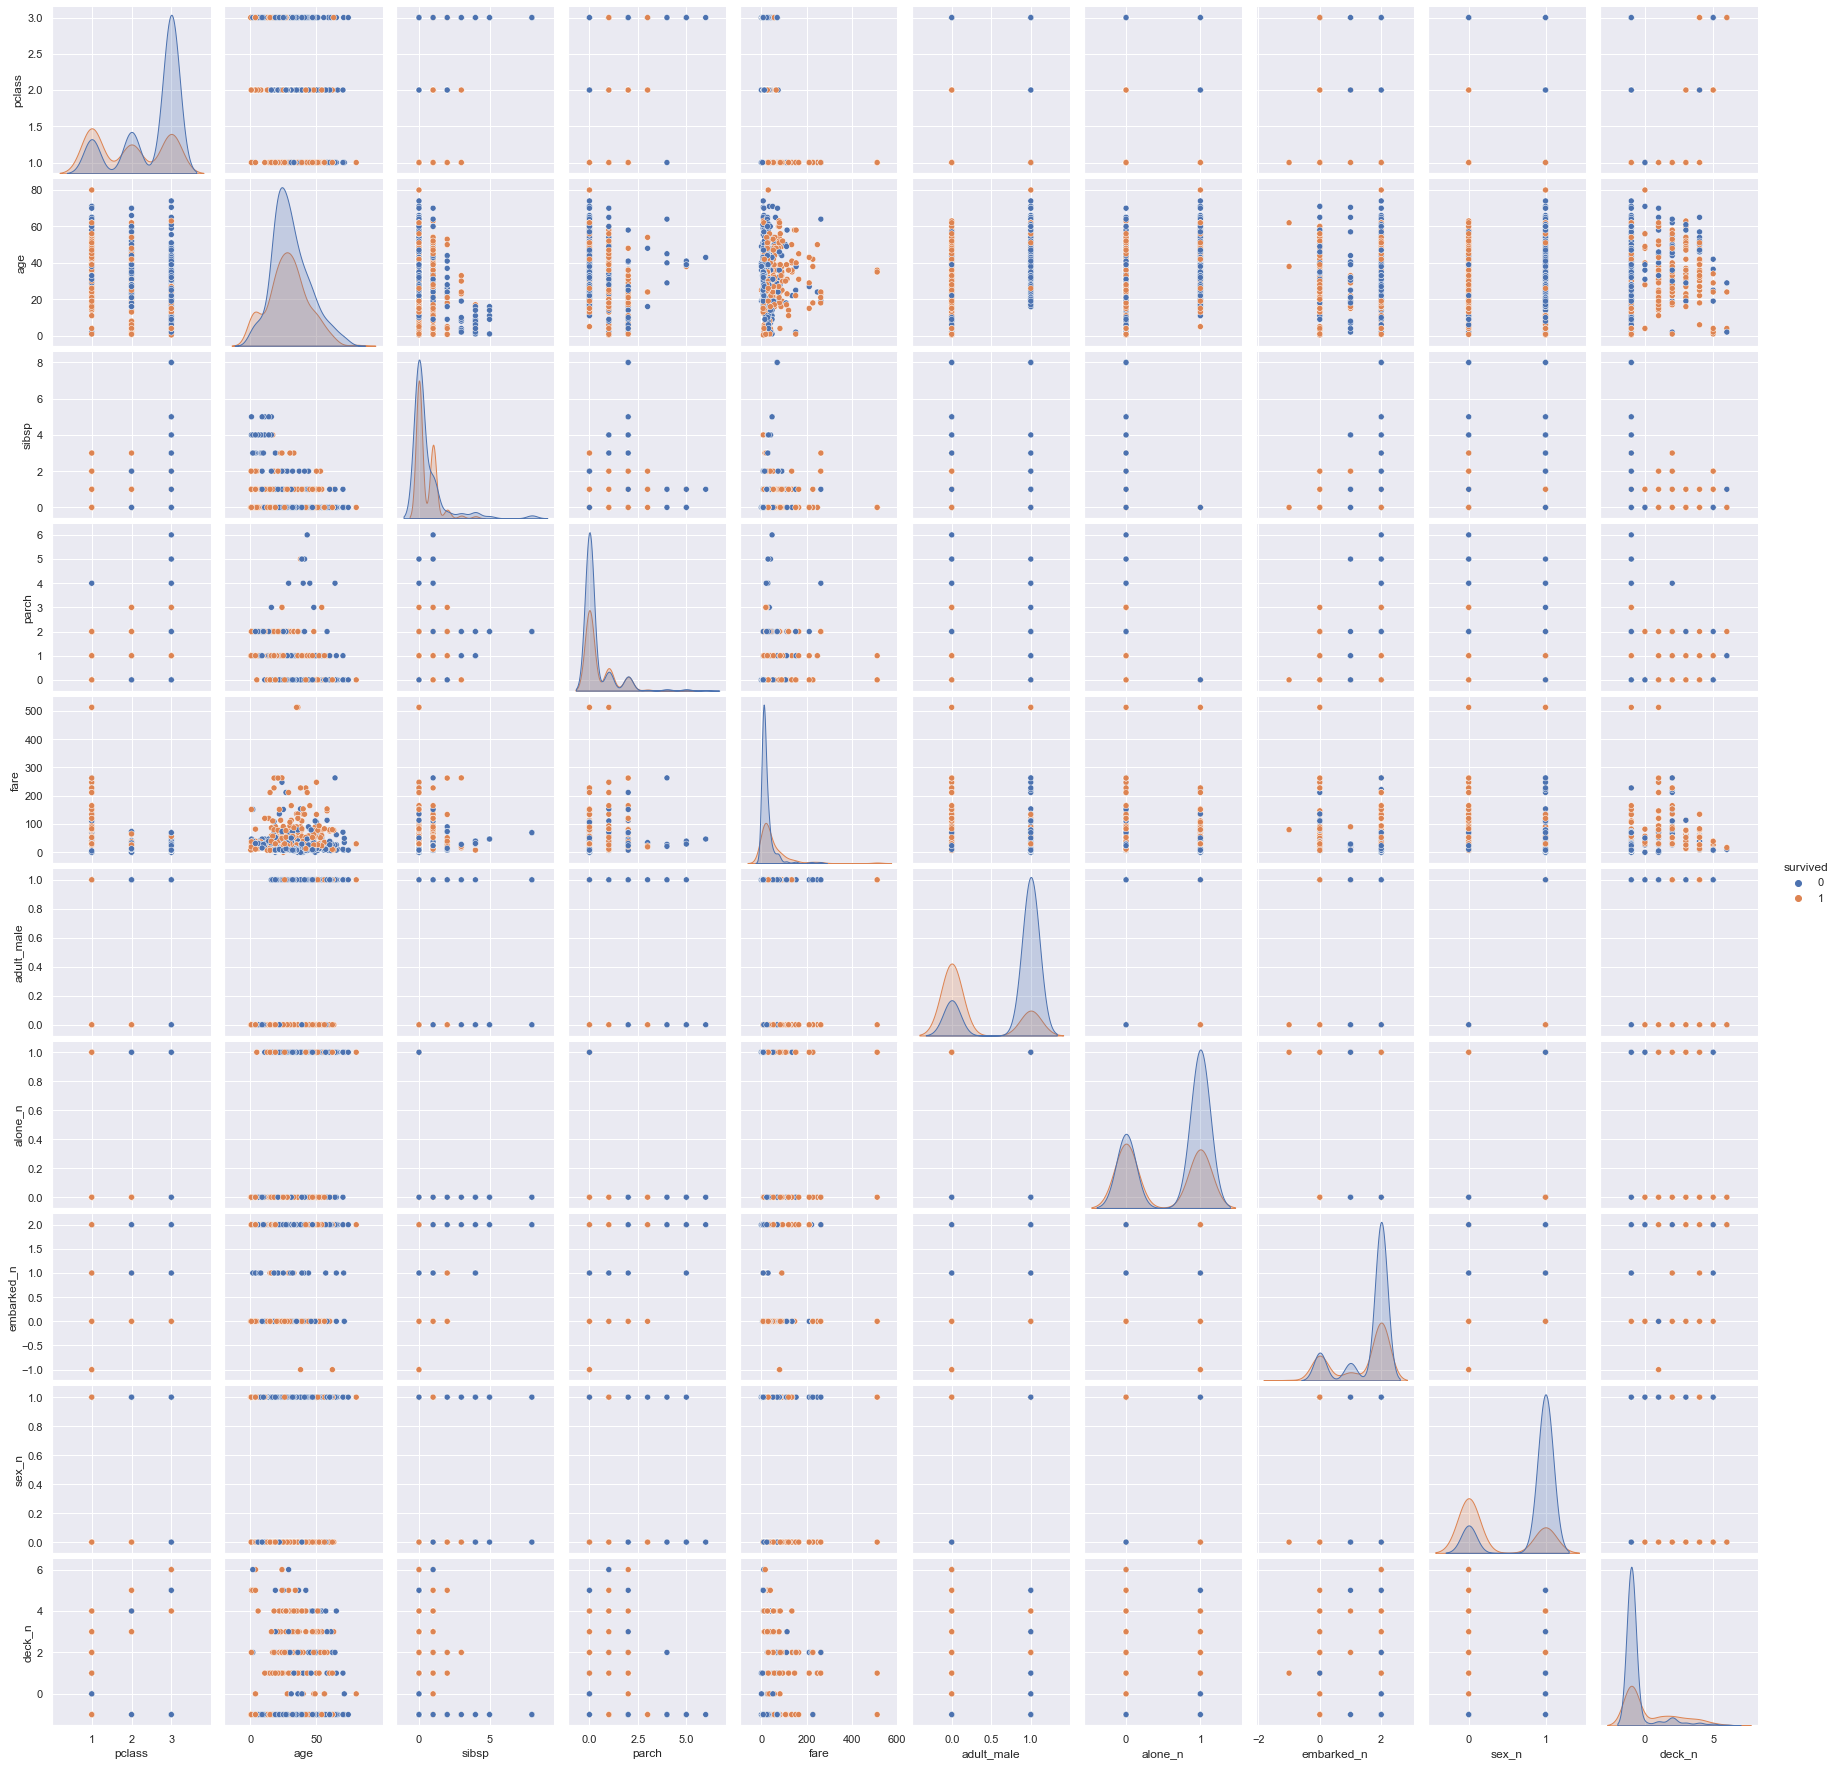

In [59]:
sns.pairplot(df[last_features], hue='survived')
plt.show()

По графикам видно, что больше всех выживших представителей 1 класса, и чем выше цена, тем выше шанс выжить.


### Рассмотрим статистическую значимость категориальных признаков отдельно:

Напишем функцию, которая бы проверяла 2 категориальных признака и определяла бы являются ли 2 признака статистически значимыми.

In [98]:
def significance_test(x, y = df['survived'], alpha = 0.05):
    df = pd.DataFrame({'x': x, 'y': y}).dropna()
    x, y = df['x'], df['y']
    contingency = pd.crosstab(x, y)
    stat, p, _, _ = chi2_contingency(contingency)
    if p < alpha:
        result = f'Признак cтатистически значимый, p-value={p}' 
    else:
        result = f'Признак не является статистически значимым, p-value={p}'
    return result

In [99]:
significance_test(df['sex'])

'Признак cтатистически значимый, p-value=1.1973570627755645e-58'

In [100]:
significance_test(df['pclass'])

'Признак cтатистически значимый, p-value=4.549251711298793e-23'

In [102]:
significance_test(df['embarked_n'])

'Признак cтатистически значимый, p-value=1.618718800945046e-06'

In [101]:
significance_test(df['age'])

'Признак не является статистически значимым, p-value=0.10141111018860959'

Таким образом, мы можем сделать вывод, что признаки sex и pclass зависят от выживаемости пассажира. Также признак embarked_n также является статистически важным. А возраст не влияет на выживаемость пассажира.